# FIFA Football Data Analysis

Our project delves into the fascinating world of football data analysis, using the comprehensive EA Sports'24 dataset. EA Sports, a division of the renowned video game company Electronic Arts Inc., specializes in creating and publishing sports video games that faithfully replicate real-world sports experiences. Our dataset spans a decade from 2014 to 2024, covering player statistics from these games.

By applying advanced data analytics techniques, we uncover actionable insights that provide a deeper understanding of the virtual footballing universe created by EA Sports. Using this dataset, we explore trends, player performance, and evolution over time, helping bridge the gap between virtual gaming and real-world football. This project serves as a testament to the powerful insights that data science can extract from seemingly simple gaming datasets, revealing valuable lessons and trends in both the gaming and real-world football communities.


Project Description:
The "FIFA Football Data Analysis" project delves into the dynamic world of football (soccer) by harnessing the power of data science and analytics to uncover valuable insights. Our dataset, the FIFA Football Players Dataset, is a comprehensive repository of information about football players from across the globe. This project aims to utilize this dataset to gain in-depth knowledge about players, teams, and the evolving landscape of the sport.
Our dataset spans a decade from 2014 to 2024, covering player statistics from these games.

**Key Objectives:**

- `Player Analysis:` Explore the profiles of football players, including their personal information, club associations, and playing attributes. Uncover which players stand out in terms of overall performance.

- `Performance Trends:` Analyze the trend of average overall player ratings over the years to understand how players' performances have evolved.

- `Top Players:` Identify and showcase the highest-rated players in terms of overall performance overtime. Recognize the standout athletes based on their attributes and gameplay.

- `Team Excellence:` Unearth the top football teams with the most balanced and skilled players. Determine the criteria that contribute to a team's success.

- `Performance Evolution:` Visualize the evolution of player performance by analyzing the average overall ratings over the years. Understand the trends and possible influencing factors.

- `Global Diversity:` Explore the diversity of nationalities represented in the dataset and discover countries with the most prominent football presence.

- `Positional Analysis:` Gain insights into the performance of players based on their positions, positions' evolution, and which positions are currently in demand.

- `Factor Analysis Insights:` Utilize factor analysis to identify underlying factors that contribute to a player's overall performance. Uncover hidden patterns and attributes that significantly influence a player's ratings, providing a deeper understanding of what makes a top football player.

This project aims to cater to both gaming enthusiasts and real-world sports fans by providing a comprehensive exploration of football data. By leveraging data science techniques and visualization, we aspire to present a holistic view of the football world and provide actionable insights that enhance the understanding of this beloved sport. Whether you are a FIFA gaming enthusiast or a football aficionado, our project has something in store for everyone.



In [1]:
#importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import plotly.express as px

#for statistical analysis 
import scipy
from scipy.stats import chisquare
from bioinfokit.analys import stat
%matplotlib inline 

pd.set_option('display.max_colwidth', None) #to display all columns in the dataframe
pd.set_option('display.max_columns', None )

import warnings
warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling

In [4]:
#top five rows

players_data=pd.read_csv('male_players.csv')
players_data.head()

player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential    value_eur  wage_eur  age  \
0           ST, LW       91         94  181500000.0  230000.0   24   
1               ST       91         94  185000000.0  340000.0   22   
2          CM, CAM       91         91  103000000.0  350000.0   32   
3          CF, CAM       90         90   41000000.0   23000.0   36   
4           CF, ST       90         90   51000000.0   95000.0   35   

          dob  height_cm  weight_kg  club_team_id            club_name  \
0  1998-12-20        182         75          73.0  Paris Saint Germain   
1  2000-07-21        195         94          10.0      Manchester City   
2  1991-06-28        181         75          10.0      Manchester City   
3  1987-06-24        169         67      112893.0          Inter Miami   
4  1987-12-19        185         81         607.0           Al Ittihad   

   league_id          league_name  league_level club_position  \
0       16.0              Ligue 1           1.0            LW   
1       13.0       Premier League           1.0            ST   
2       13.0       Premier League           1.0           SUB   
3       39.0  Major League Soccer           1.0            RF   
4      350.0           Pro League           1.0            RS   

   club_jersey_number club_loaned_from club_joined_date  \
0                 7.0              NaN       2018-07-01   
1                 9.0              NaN       2022-07-01   
2                17.0              NaN       2015-08-30   
3                10.0              NaN       2023-07-16   
4                 9.0              NaN       2023-07-01   

   club_contract_valid_until_year  nationality_id nationality_name  \
0                          2024.0              18           France   
1                          2027.0              36           Norway   
2                          2025.0               7          Belgium   
3                          2025.0              52        Argentina   
4                          2026.0              18           France   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1335.0              LW                  10.0          Right   
1          1352.0              ST                   9.0           Left   
2          1325.0             CAM                   7.0          Right   
3          1369.0              RW                  10.0           Left   
4             NaN             NaN                   NaN          Right   

   weak_foot  skill_moves  international_reputation      work_rate  \
0          4            5                         5       High/Low   
1          3            3                         5    High/Medium   
2          5            4                         5    High/Medium   
3          4            4                         5        Low/Low   
4          4            4                         5  Medium/Medium   

          body_type real_face  release_clause_eur  \
0            Unique       Yes         349400000.0   
1            Unique       Yes         356100000.0   
2            Unique       Yes         190600000.0   
3            U

In [6]:
players_data.shape

(180021, 109)

In [7]:
#descriptive statistics of players attributes 
players_data.describe()

player_id   fifa_version  fifa_update        overall  \
count  180021.000000  180021.000000     180021.0  180021.000000   
mean   217326.670294      19.621450          2.0      65.712711   
std     35215.749284       2.838621          0.0       7.018104   
min         2.000000      15.000000          2.0      40.000000   
25%    200759.000000      17.000000          2.0      61.000000   
50%    222734.000000      20.000000          2.0      66.000000   
75%    239858.000000      22.000000          2.0      70.000000   
max    278145.000000      24.000000          2.0      94.000000   

           potential     value_eur      wage_eur            age  \
count  180021.000000  1.778680e+05  178173.00000  180021.000000   
mean       70.779581  2.379142e+06   10638.01081      25.138689   
std         6.255569  6.184358e+06   21637.41400       4.679389   
min        40.000000  1.000000e+03     500.00000      16.000000   
25%        66.000000  3.250000e+05    2000.00000      21.000000   
50%        71.000000  7.500000e+05    4000.00000      25.000000   
75%        75.000000  1.800000e+06   10000.00000      28.000000   
max        95.000000  1.940000e+08  575000.00000      54.000000   

           height_cm      weight_kg   club_team_id      league_id  \
count  180021.000000  180021.000000  178156.000000  178156.000000   
mean      181.287061      75.233356   45263.728210     221.747991   
std         6.764179       6.999181   53516.528046     467.804515   
min       154.000000      49.000000       1.000000       1.000000   
25%       176.000000      70.000000     450.000000      19.000000   
50%       181.000000      75.000000    1891.000000      56.000000   
75%       186.000000      80.000000  110912.000000     308.000000   
max       208.000000     110.000000  131389.000000    2149.000000   

        league_level  club_jersey_number  club_contract_valid_until_year  \
count  177771.000000       178156.000000                   178156.000000   
mean        1.380878           20.302297                     2020.816015   
std         0.750647           17.054347                        2.902942   
min         1.000000            1.000000                     2014.000000   
25%         1.000000            8.000000                     2019.000000   
50%         1.000000           17.000000                     2021.000000   
75%         2.000000           27.000000                     2023.000000   
max         5.000000           99.000000                     2032.000000   

       nationality_id  nation_team_id  nation_jersey_number      weak_foot  \
count   180021.000000    10098.000000          10098.000000  180021.000000   
mean        55.657218    29845.186671             12.226580       2.939657   
std         48.050844    47980.430480              6.911397       0.664775   
min          1.000000      974.000000              1.000000       1.000000   
25%         21.000000     1343.000000              6.000000       3.000000   
50%         45.000000     1365.000000             12.000000       3.000000   
75%         56.000000   105035.000000             18.000000       3.000000   
max        219.000000   111527.000000             97.000000       5.000000   

         skill_moves  international_reputation  release_clause_eur  \
count  180021.000000             180021.000000        1.207220e+05   
mean        2.335689                  1.105171        4.878321e+06   
std         0.754452                  0.381699        1.271795e+07   
min         1.000000                  1.000000        9.000000e+03   
25%         2.000000                  1.000000        6.332500e+05   
50%         2.000000                  1.000000        1.400000e+06   
75%         3.000000                  1.000000        3.600000e+06   
max         5.000000                  5.000000        3.735000e+08   

                pace       shooting        passing      dribbling  \
count  159997.000000  159997.000000  159997.000000  159997.000000   
mean       68.058839    

In [8]:
#numerical columns
numerical_columns = players_data.select_dtypes(include=['number'])
numerical_columns.columns

Index(['player_id', 'fifa_version', 'fifa_update', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'league_id', 'league_level', 'club_jersey_number',
       'club_contract_valid_until_year', 'nationality_id', 'nation_team_id',
       'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_intercept

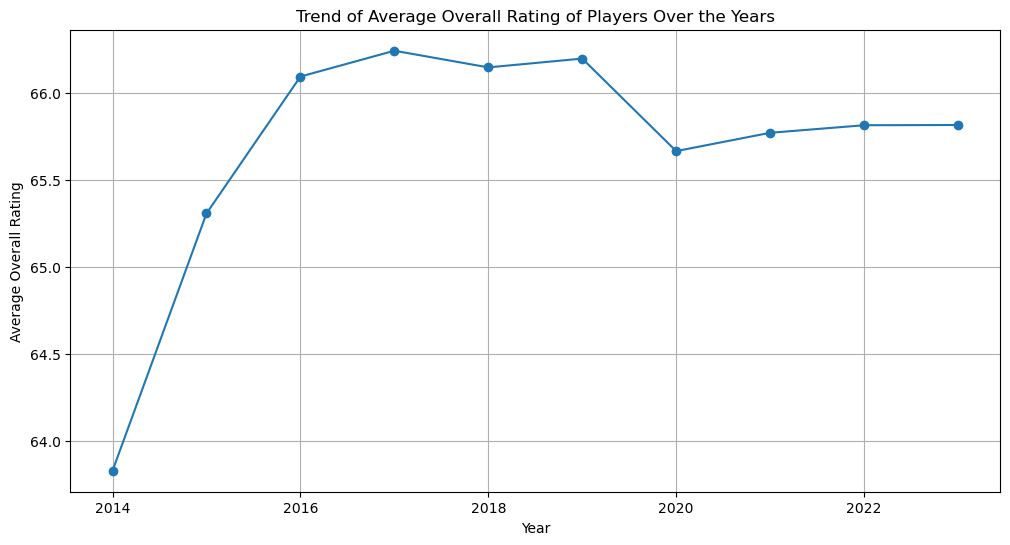

In [9]:
# Convert the 'date' column to datetime format
players_data['update_as_of'] = pd.to_datetime(players_data['update_as_of'])

# Extract the year from the 'date' column and create a new column 'year'
players_data['year'] = players_data['update_as_of'].dt.year

# Group the data by 'year' and calculate the average overall rating for each year
average_ratings_by_year = players_data.groupby('year')['overall'].mean()

# Create a line plot to show the trend
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.title('Trend of Average Overall Rating of Players Over the Years')
plt.grid(True)

plt.show()


In [1]:
# # Assuming your DataFrame is named 'players_data'
# unique_positions = players_data['player_positions'].unique()

# # Iterate through the unique labels
# for position in unique_positions:
#     print(position)


In [11]:
# Define a function to categorize player positions
def categorize_positions(positions):
    if 'M' in positions:
        return 'Midfield'
    if any(role in positions for role in ['D', 'CB', 'RWB', 'LWB', 'LB', 'RB']):
        return 'Defense'
    if any(role in positions for role in ['CF', 'ST', 'RW', 'LW']):
        return 'Attacker'
    if 'GK' in positions:
        return 'Goalkeeper'
    return 'Unknown'

# Apply the categorization function to create a new column
players_data['position_category'] = players_data['player_positions'].apply(categorize_positions)

# Display the updated DataFrame

In [12]:
players_data['position_category'].value_counts()

position_category
Midfield      84336
Defense       49342
Attacker      26319
Goalkeeper    20024
Name: count, dtype: int64

In [13]:
category_counts = players_data['position_category'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(
    values=category_counts,
    names=category_counts.index,
    title='Player Position Categories Distribution'
)

fig.show()


In [14]:
category_counts = players_data['preferred_foot'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(
    values=category_counts,
    names=category_counts.index,
    title='Players Preferred Foot Distribution'
)

fig.show()


**Distribution of Numerical Attributes**

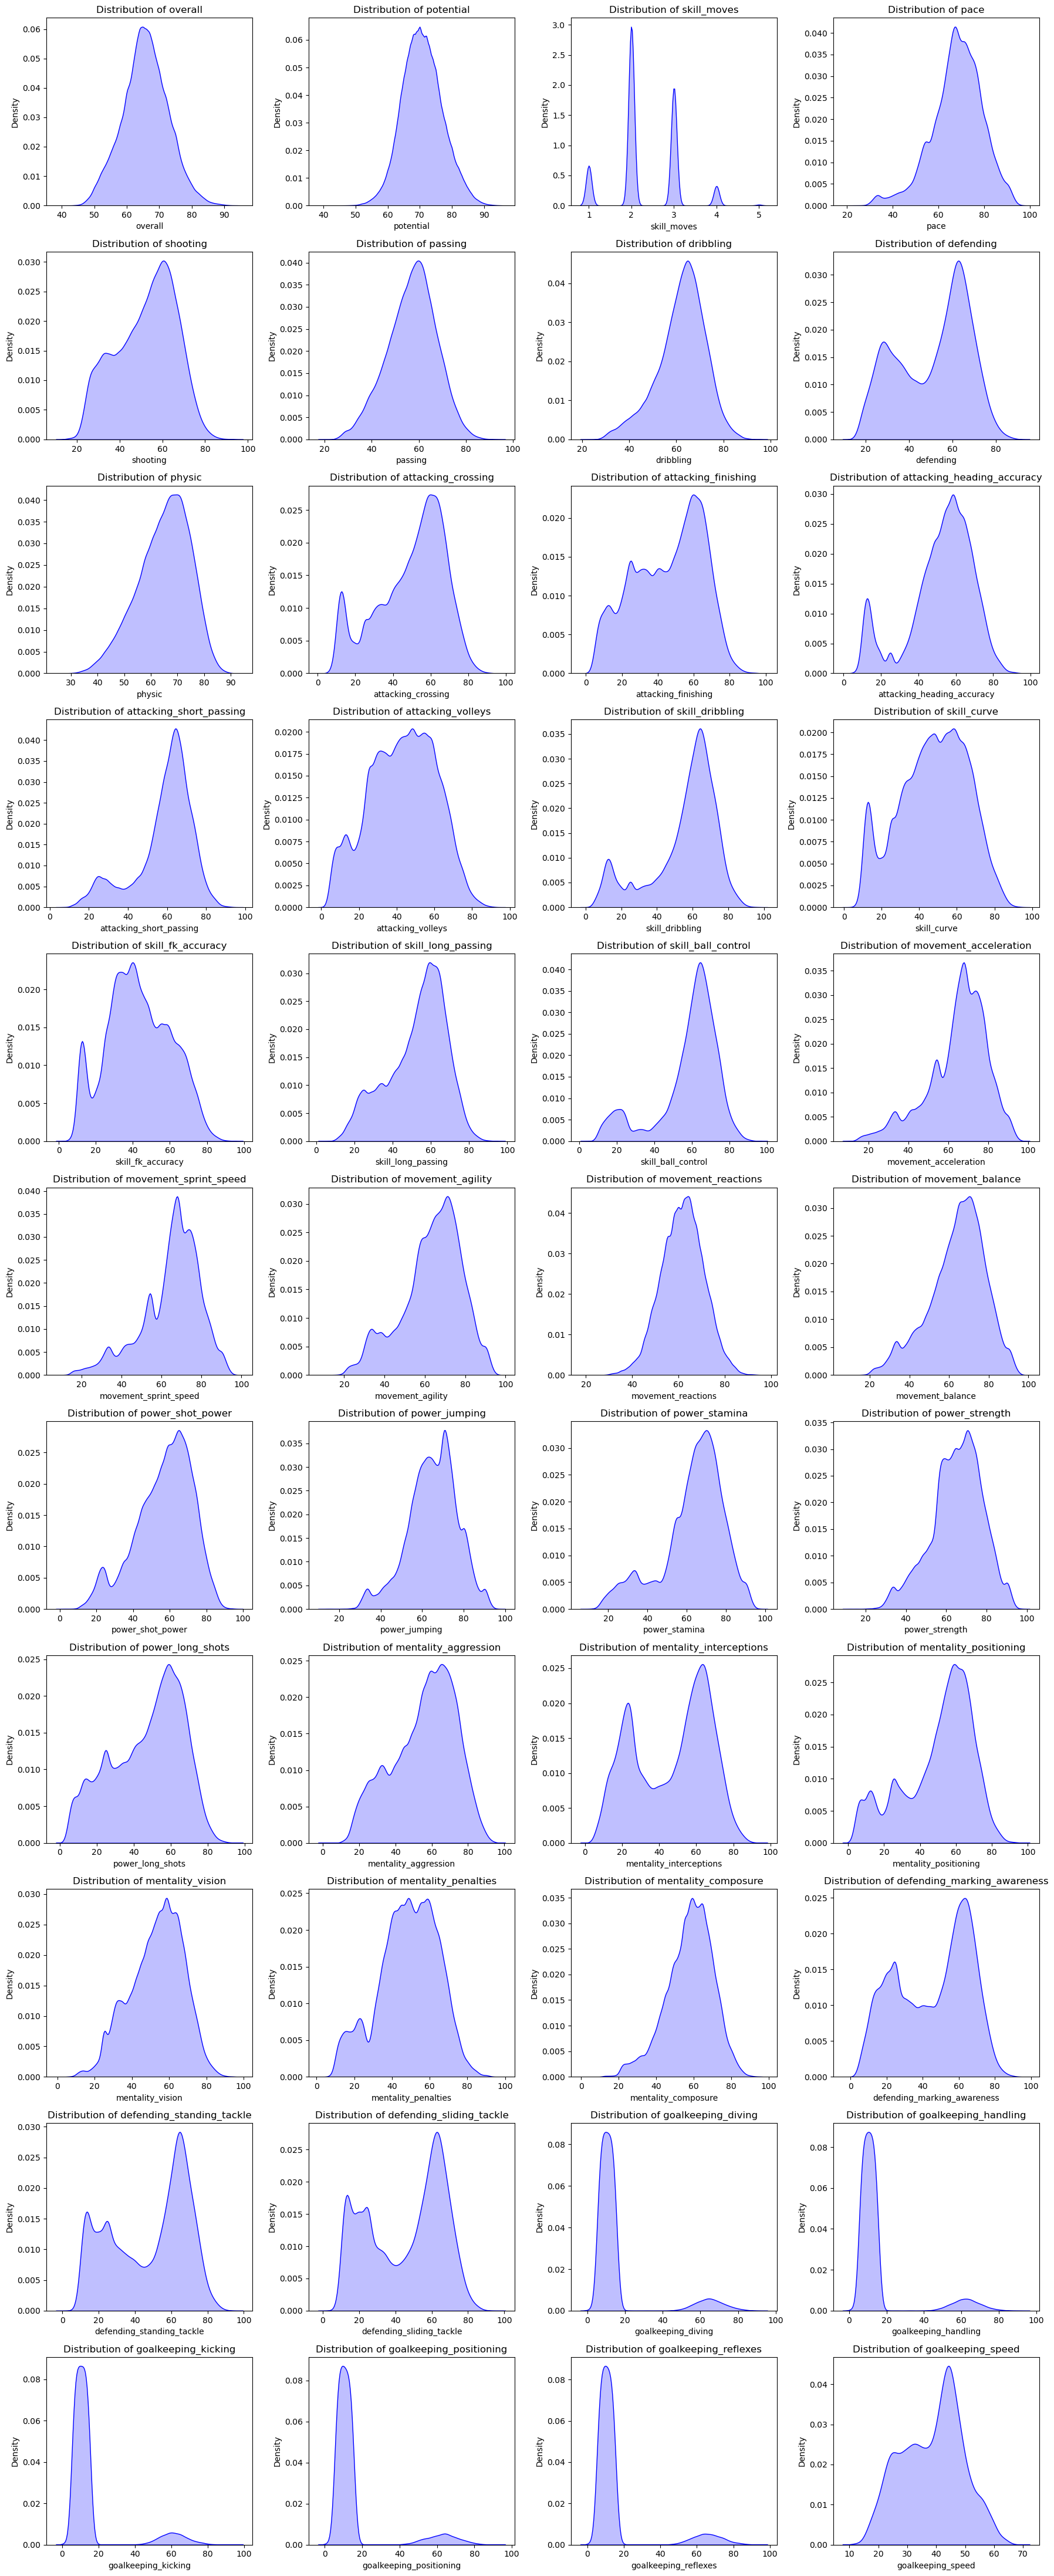

In [15]:
# Select the variables we want to plot
players_variables_to_plot = ['overall', 'potential', 
       'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

# Calculate the number of rows and columns needed for subplots
n_variables = len(players_variables_to_plot)
n_rows = (n_variables - 1) // 4 + 1
n_columns = min(n_variables, 4)

# Create subplots for the variables
plt.figure(figsize=(18, 4 * n_rows))

# Loop through the selected variables and create density plots
for i, variable in enumerate(players_variables_to_plot, 1):
    plt.subplot(n_rows, n_columns, i)
    sns.kdeplot(players_data[variable], shade=True, color='b')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()  # Display the plot


**correlation between Variables**

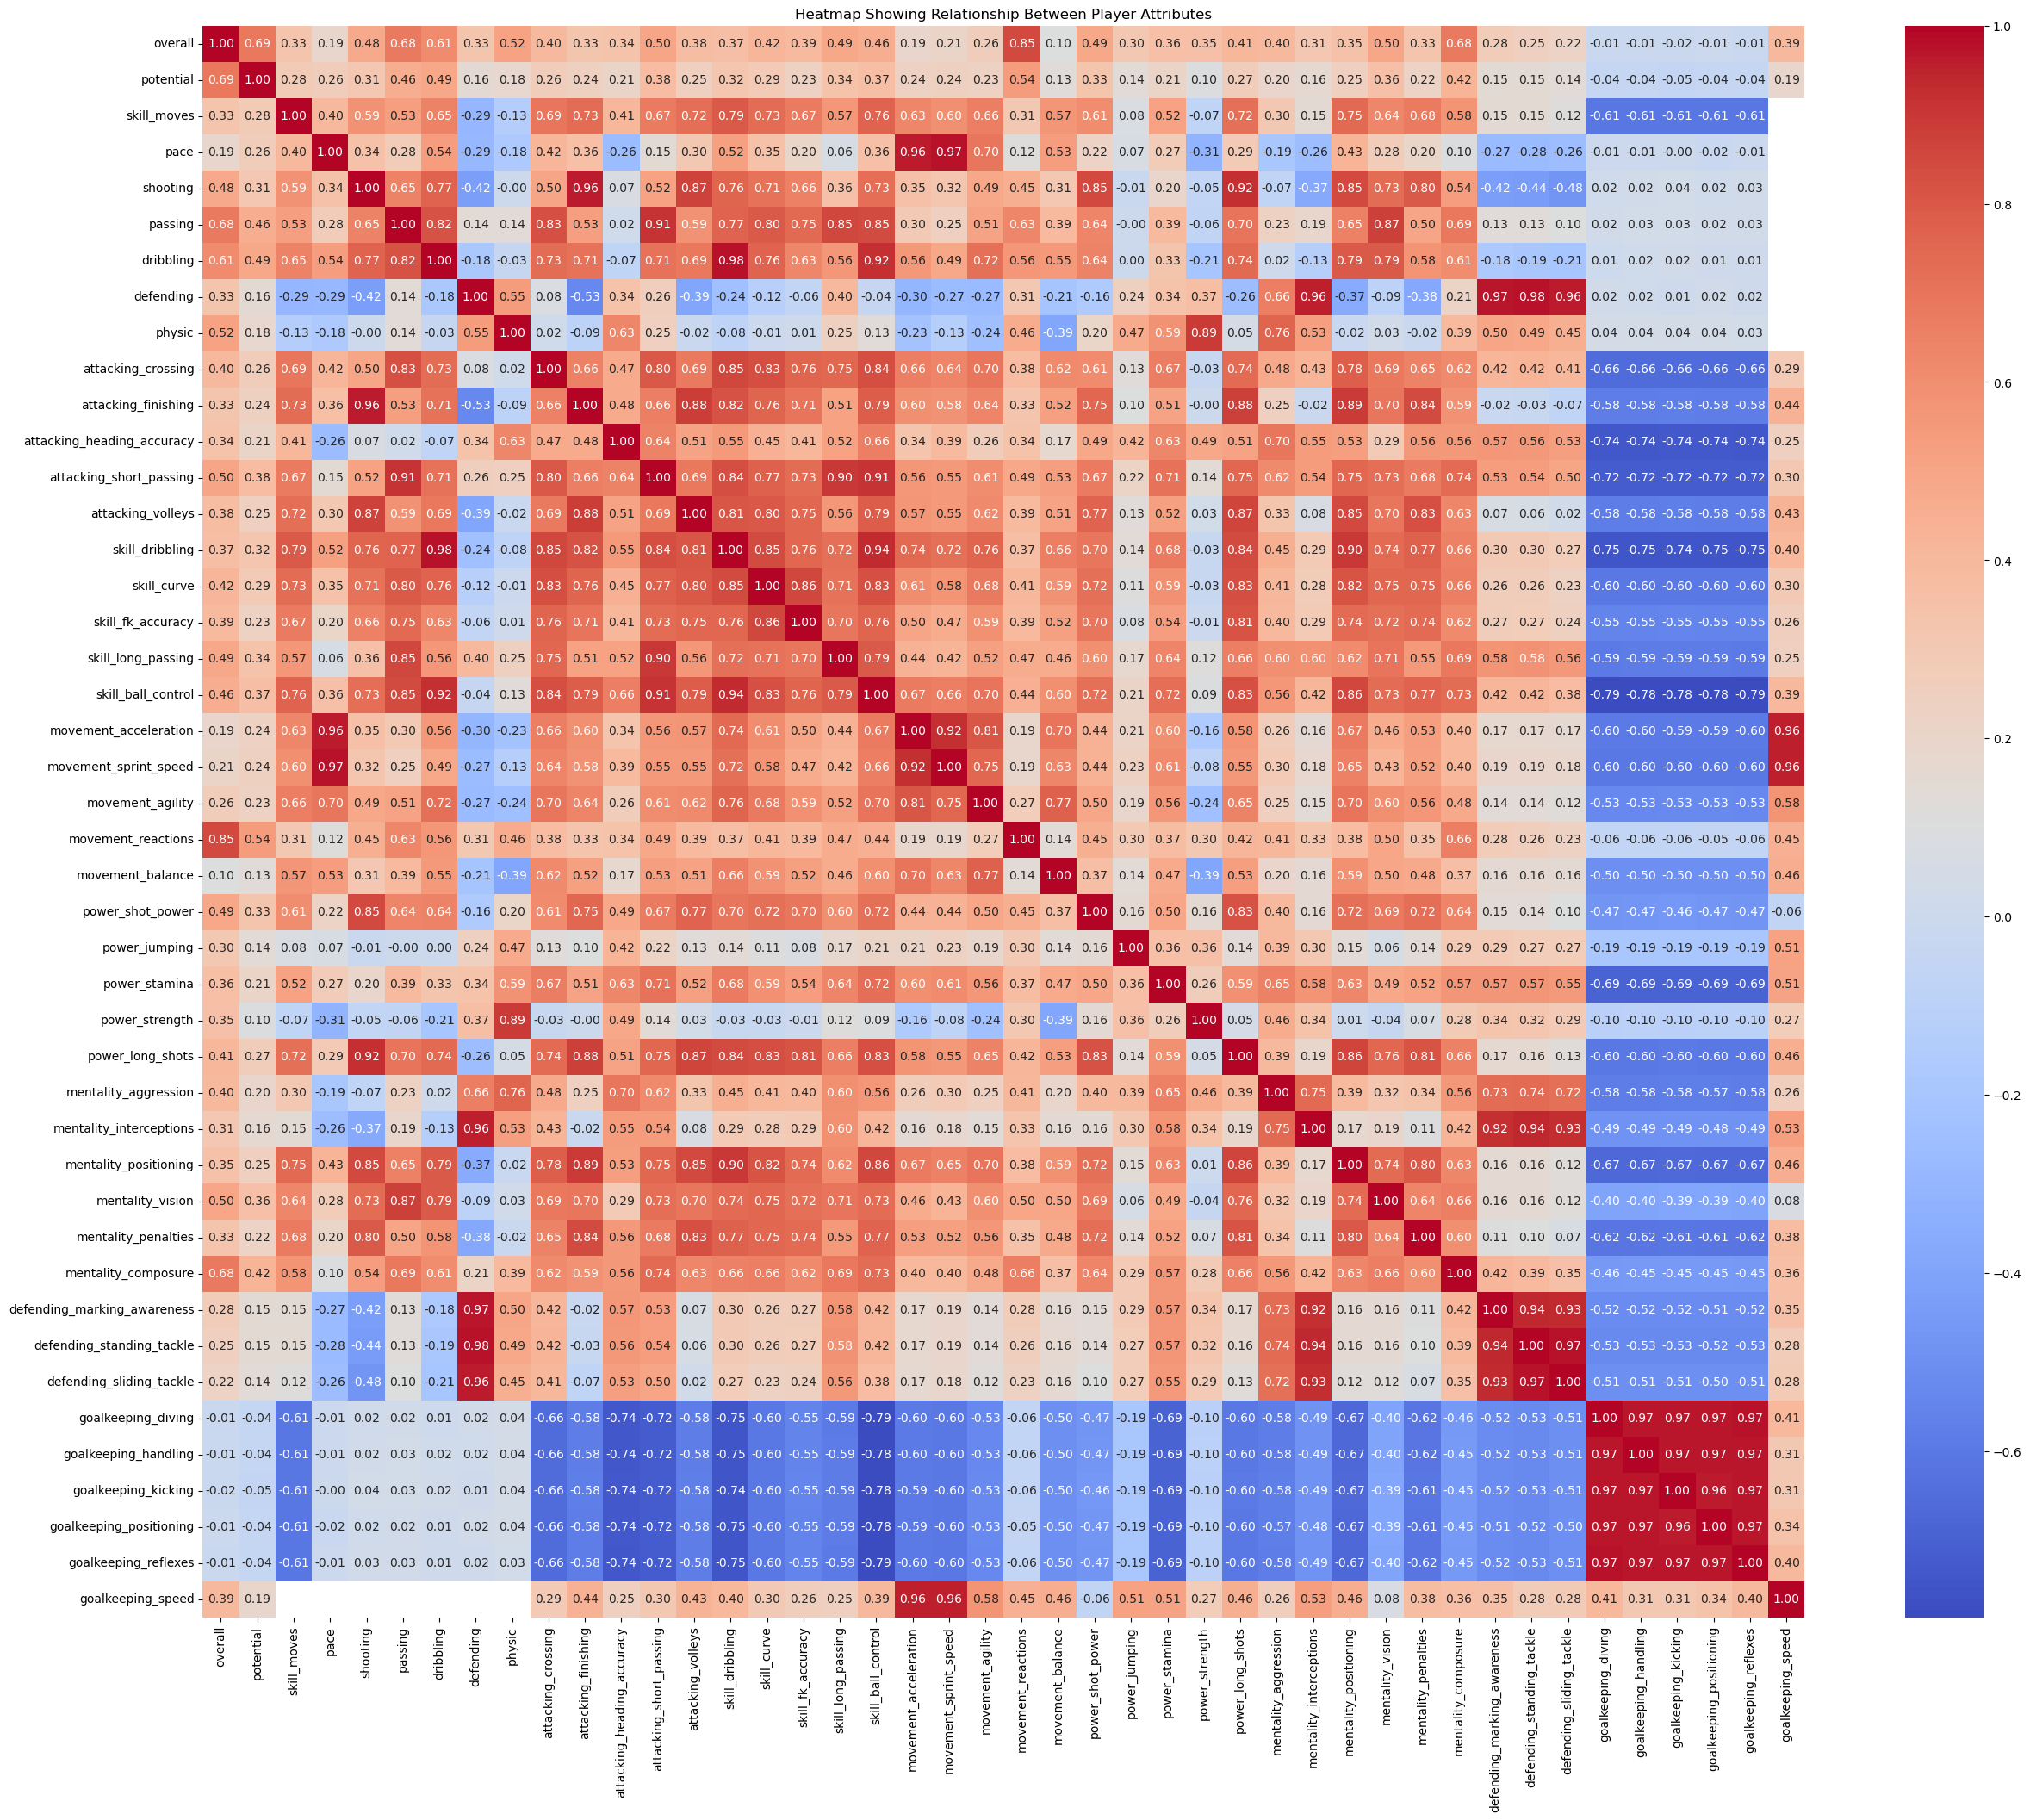

In [16]:
players_num = players_data[players_variables_to_plot]
#let's see how these attributes relate with each other with heatmap
plt.figure(figsize=(30,24))
sns.heatmap(players_num.corr(), cmap='coolwarm', annot=True, fmt='.2f').\
set_title('Heatmap Showing Relationship Between Player Attributes');


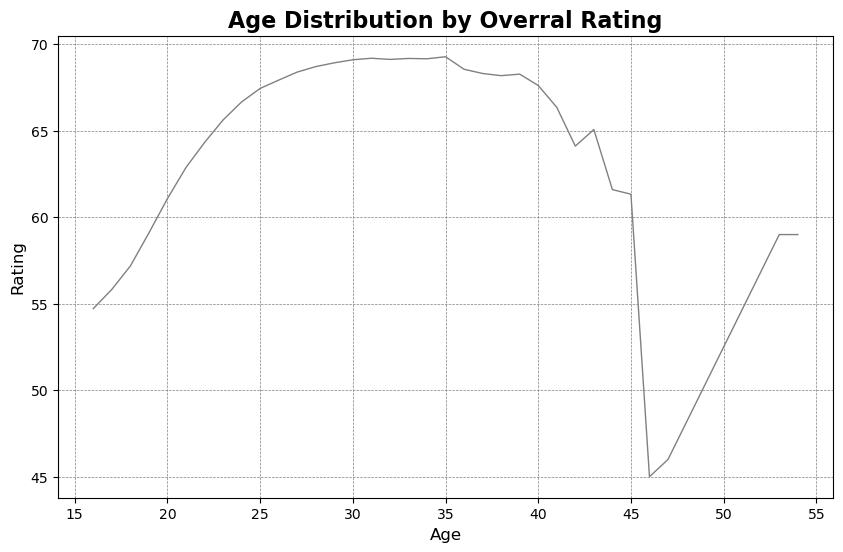

In [113]:
# Group by 'Age' and calculate the mean of 'Overall' rating
age_rating_mean = players_data.groupby('age')['overall'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(age_rating_mean['age'], age_rating_mean['overall'], color='grey', linewidth=1)
plt.title("Age Distribution by Overral Rating", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()


In [114]:
players_data.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'year', 'position_category',
       'Cluster', 'player_category'],
      dtype='object', length=113)

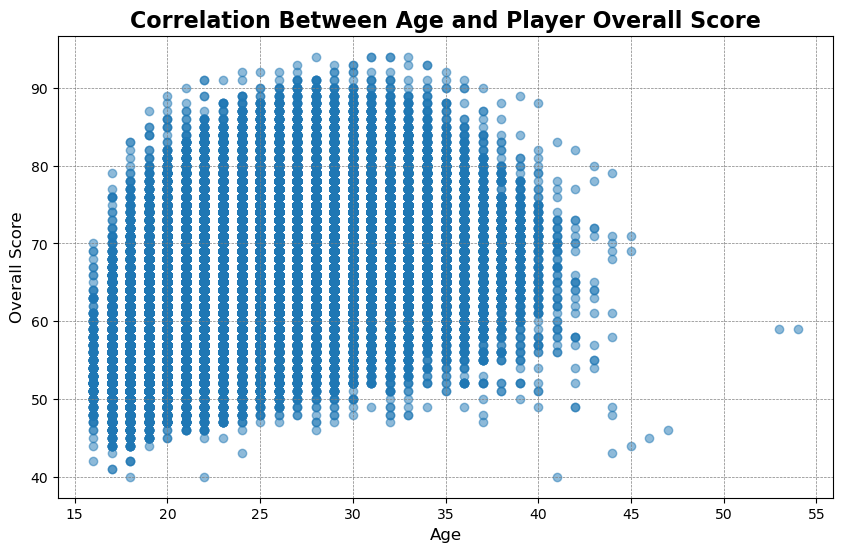

In [24]:

# Assuming you have a DataFrame named 'fifa_data' with columns 'Age' and 'Overall'
age = players_data['age']
overall = players_data['overall']

plt.figure(figsize=(10, 6))
plt.scatter(age, overall, alpha=0.5)
plt.title("Correlation Between Age and Player Overall Score", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()


In [27]:
filtered_data

NameError: name 'filtered_data' is not defined

In [25]:
players_data

player_id                                             player_url  \
0          231747                    /player/231747/kylian-mbappe/240002   
1          239085                   /player/239085/erling-haaland/240002   
2          192985                  /player/192985/kevin-de-bruyne/240002   
3          158023                     /player/158023/lionel-messi/240002   
4          165153                    /player/165153/karim-benzema/240002   
...           ...                                                    ...   
180016     220806   https://sofifa.com/player/220806/ellis-redman/150002   
180017     225509  https://sofifa.com/player/225509/aaron-collins/150002   
180018     217591    https://sofifa.com/player/217591/piotr-zemlo/150002   
180019     222947     https://sofifa.com/player/222947/tom-davies/150002   
180020     201197   https://sofifa.com/player/201197/paul-tisdale/150002   

        fifa_version  fifa_update update_as_of    short_name  \
0               24.0          2.0   2023-09-22     K. Mbappé   
1               24.0          2.0   2023-09-22    E. Haaland   
2               24.0          2.0   2023-09-22  K. De Bruyne   
3               24.0          2.0   2023-09-22      L. Messi   
4               24.0          2.0   2023-09-22    K. Benzema   
...              ...          ...          ...           ...   
180016          15.0          2.0   2014-09-18     E. Redman   
180017          15.0          2.0   2014-09-18    A. Collins   
180018          15.0          2.0   2014-09-18      P. Żemło   
180019          15.0          2.0   2014-09-18     T. Davies   
180020          15.0          2.0   2014-09-18    P. Tisdale   

                             long_name player_positions  overall  potential  \
0                 Kylian Mbappé Lottin           ST, LW       91         94   
1                 Erling Braut Haaland               ST       91         94   
2                      Kevin De Bruyne          CM, CAM       91         91   
3       Lionel Andrés Messi Cuccittini          CF, CAM       90         90   
4                        Karim Benzema           CF, ST       90         90   
...                                ...              ...      ...        ...   
180016                    Ellis Redman               CB       41         61   
180017       Aaron Graham John Collins               ST       41         50   
180018                     Piotr Żemło           LM, LB       40         50   
180019       Thomas Christopher Davies               CB       40         49   
180020                    Paul Tisdale          CM, CAM       40         40   

          value_eur  wage_eur  age         dob  height_cm  weight_kg  \
0       181500000.0  230000.0   24  1998-12-20        182         75   
1       185000000.0  340000.0   22  2000-07-21        195         94   
2       103000000.0  350000.0   32  1991-06-28        181         75   
3        41000000.0   23000.0   36  1987-06-24        169         67   
4        51000000.0   95000.0   35  1987-12-19        185         81   
...             ...       ...  ...         ...        ...        ...   
180016      20000.0    2000.0   17  1996-09-26        187         81   
180017      30000.0    2000.0   17  1997-06-01        178         57   
180018      15000.0    2000.0   18  1995-07-10        190         76   
180019      15000.0    2000.0   22  1992-04-18        180         70   
180020          NaN    2000.0   41  1973-01-14        175         72   

        club_team_id            club_name  league_id          league_name  \
0               73.0  Paris Saint Germain       16.0              Ligue 1   
1               10.0      Manchester City       13.0       Premier League   
2               10.0      Manchester City       13.0       Premier League   
3           112893.0          Inter Miami       39.0  Major League Soccer   
4              607.0           Al Ittihad      350.0           Pro League   
...              ...                  ...        .

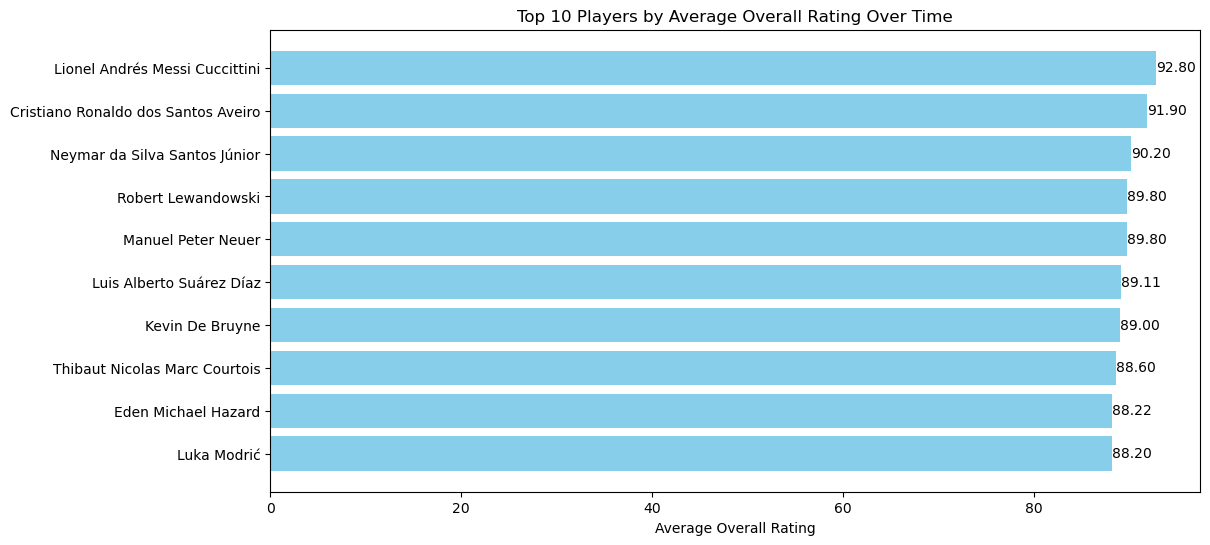

In [10]:
# Group by player_name and calculate the average overall rating
top_10_players = players_data.groupby('long_name')[['overall']].mean().sort_values(by='overall', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_players.index, top_10_players['overall'], color='skyblue')
plt.xlabel('Average Overall Rating')
plt.title('Top 10 Players by Average Overall Rating Over Time')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', color='black')

plt.show()


In [11]:
# players_data[players_data['long_name']=='Cristiano Ronaldo dos Santos Aveiro']

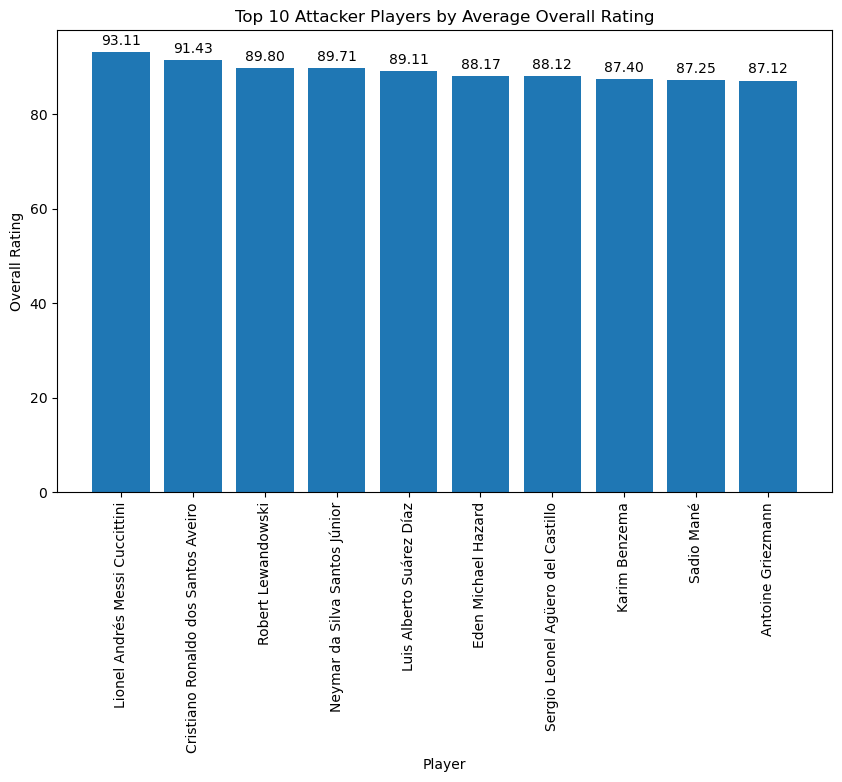

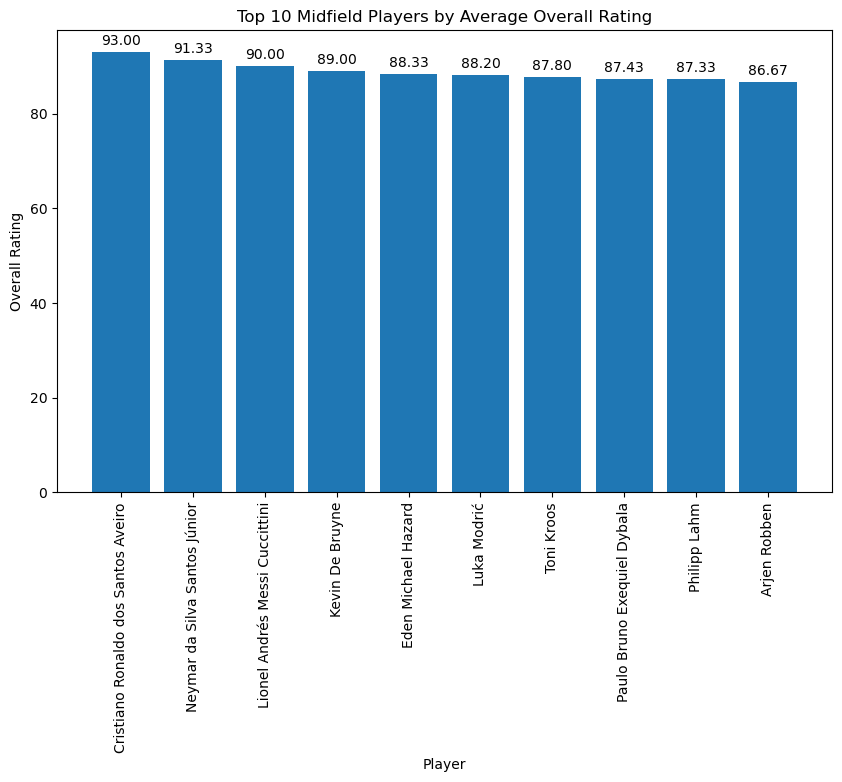

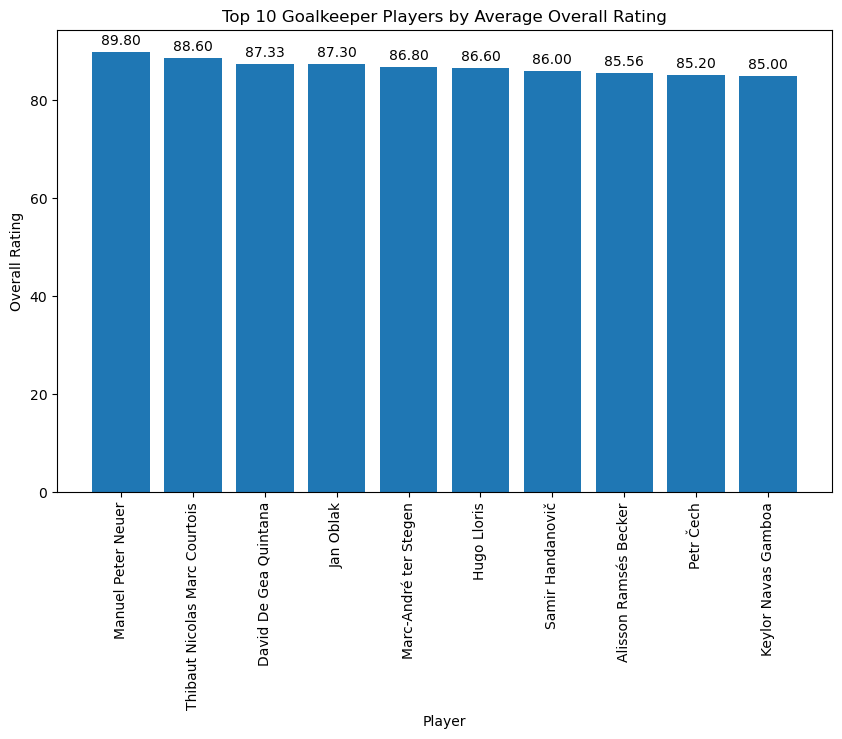

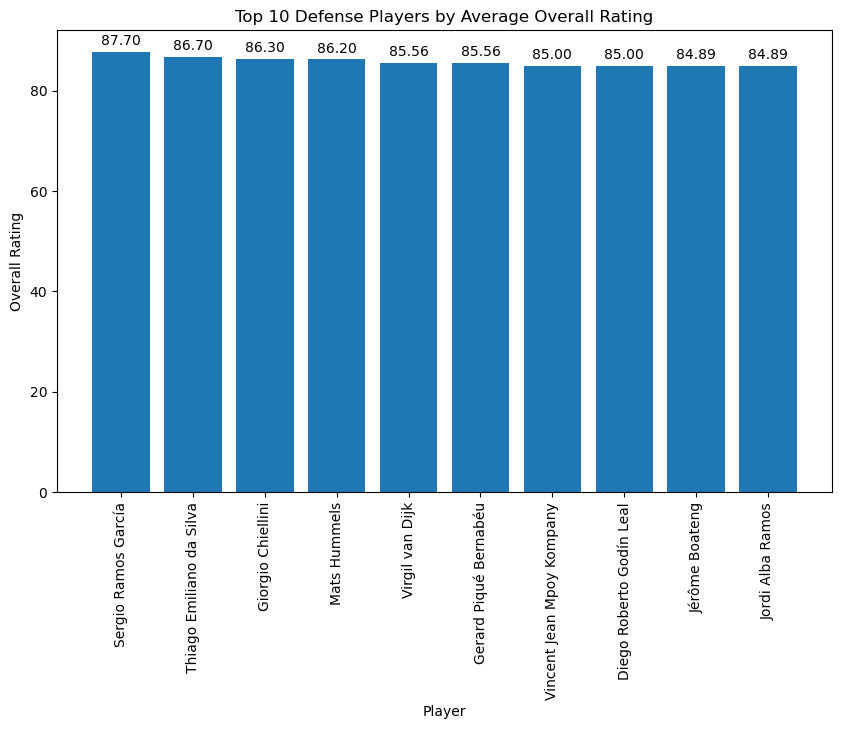

In [66]:
# Initialize an empty dictionary to store the top players for each category
top_players_by_category = {}

# Get unique categories
categories = players_data['position_category'].unique()

# Loop through each category
for category in categories:
    # Filter data for the current category
    category_df = players_data[players_data['position_category'] == category]

    # Calculate the mean overall rating for each player in the category
    avg_ratings = category_df.groupby('long_name')[['overall']].mean()

    # Sort the players by average rating in descending order
    top_players = avg_ratings.sort_values(by='overall', ascending=False).head(10)

    # Store the top players for the category
    top_players_by_category[category] = top_players

# Create bar charts for the top 10 players in each category
for category, top_players in top_players_by_category.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_players.index, top_players['overall'])
    plt.xlabel('Player')
    plt.ylabel('Overall Rating')
    plt.title(f'Top 10 {category} Players by Average Overall Rating')
    plt.xticks(rotation=90)

    # Add data labels to the bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    plt.show()


### Analyzing Football Player Attributes Using Factor Analysis (FA)

Factor analysis is a powerful statistical technique used to explore the underlying structure and relationships among a set of observed variables. FA analysis can provide valuable insights into the latent factors that may influence a player's performance. 

Description:

Football is a game of skill, precision, and teamwork. To gain a deeper understanding of what makes a player truly exceptional, we would look into the  player attributes. From their dribbling finesse to their goalkeeping prowess, footballers possess a wide range of skills and abilities.

Factor Analysis is our key to unlocking the hidden patterns within these attributes. Our goal is to simplify the complexity of player attributes and discover the latent factors that drive performance on the field. By identifying these underlying factors, we aim to gain insights into the essential skills and characteristics that contribute to a player's success.

We will analyze attributes such as crossing, finishing, sprint speed, and goalkeeping reflexes. Through Factor Analysis, we'll uncover whether these attributes can be grouped into common factors, providing a more comprehensive perspective on player capabilities. Are there inherent skills that define an exceptional forward, midfielder, or defender? Our analysis seeks to answer these questions and offer a fresh perspective on the intricate world of football player attributes.

By revealing the underlying factors, we aim to help football enthusiasts, coaches, and analysts better understand what truly matters on the pitch. Factor Analysis can provide a structured approach to evaluating players, informing recruitment strategies, and enhancing overall team performance.

In [17]:
fa_attributes = players_data[['skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_fa_attributes = scaler.fit_transform(fa_attributes)

# Create a new DataFrame with the scaled data
scaled_fa_attributes_df = pd.DataFrame(scaled_fa_attributes, columns=fa_attributes.columns)

# Display the first few rows of the scaled data
scaled_fa_attributes_df.head()


skill_moves      pace  shooting   passing  dribbling  defending    physic  \
0     3.531462  2.615847  2.710496  2.206085   2.919502  -0.918707  1.350571   
1     0.880524  1.892767  2.926003  0.863500   1.745420  -0.375905  2.375620   
2     2.205993  0.356222  2.566824  3.548670   2.430301   0.830322  1.350571   
3     2.205993  1.079302  2.494989  3.165074   3.115182  -1.099641 -0.084497   
4     2.205993  0.988917  2.566824  2.493782   2.430301  -0.737773  1.350571   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            1.577773             2.505672                    1.212760   
1           -0.145816             2.609401                    1.795978   
2            2.522966             2.038895                    0.162967   
3            1.855771             2.246352                    0.454576   
4            1.410974             2.350080                    2.204230   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 1.881440           2.351108         2.025548     1.807784   
1                 1.267159           2.694961         1.273429     1.641669   
2                 2.427468           2.293799         1.649489     2.472246   
3                 2.222707           2.465726         2.186717     2.527617   
4                 2.086200           2.580343         1.703211     1.918528   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           1.510327            1.205550            2.035909   
1           1.103262            0.019159            1.432651   
2           2.324457            2.721493            2.035909   
3           2.905979            2.457851            2.096234   
4           1.742936            1.535103            1.975583   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               2.184306               2.209465          2.011277   
1               1.170077               2.003186          0.856815   
2               0.493924               0.490472          0.720996   
3               1.508153               0.627991          1.875458   
4               0.899616               0.971790          0.924724   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0            3.434887          1.281600          2.170462       1.931016   
1            3.544237          0.571516          2.432063       2.351225   
2            3.325538          0.997566          2.301263       0.586349   
3            2.888139          2.204710          1.712660       0.502307   
4            3.325538          0.571516          1.974261       1.678891   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0       1.570416        0.941046          1.884312              0.482398   
1       0.814542        2.209352          2.041782              1.821469   
2       1.570416        0.703238          2.356722              1.122823   
3       0.436606        0.227623          2.251742             -0.682011   
4       1.192479        1.337392          1.779332              0.424177   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                -0.422140               2.233458          2.100373   
1                -0.177214               2.389452          1.466297   
2                 0.949447               1.973469          2.945808   
3                -0.324170               2.129463          2.734449   
4                -0.373155               2.181460          2.593543   

   mentality_penalties  mentality_composure  defending_marking_awareness  \
0             2.261723             2.451024                    -0.970615   
1             2.261723             2.369763                    -0.383888   
2             2.197869             2.451024                     0.985141   
3             1.687034             3.101116                    -1.263979   
4             2.325578             2.613547                    -0.139419   

   d

In [19]:
# Instantiate factor analysis object
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax')
fa.fit(scaled_fa_attributes_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.97838133e+01, 7.20427928e+00, 3.94404311e+00, 2.39051134e+00,
       1.86324558e+00, 1.04229036e+00, 6.77907216e-01, 5.24061991e-01,
       4.28070691e-01, 3.73943440e-01, 3.67305270e-01, 3.26463512e-01,
       2.92165156e-01, 2.72377547e-01, 2.55622146e-01, 2.26590624e-01,
       2.10751295e-01, 2.05445104e-01, 1.80466501e-01, 1.64400612e-01,
       1.50858179e-01, 1.35502024e-01, 1.27401039e-01, 1.05939101e-01,
       9.07683844e-02, 8.05265395e-02, 7.53667811e-02, 7.20601283e-02,
       6.98798025e-02, 6.62933940e-02, 6.45513796e-02, 3.92978619e-02,
       3.69086141e-02, 3.12133474e-02, 3.06107716e-02, 2.67862928e-02,
       2.39090917e-02, 2.20081645e-02, 9.14499795e-03, 3.38499096e-03,
       2.11769039e-03, 1.71738559e-03])

We are employing the Kaiser Criterion for selecting the number of factors in our factor analysis. According to this criterion, we will retain factors for which the eigenvalues are greater than 1. Eigenvalues measure the variance explained by each factor, and an eigenvalue exceeding 1 signifies that the factor accounts for more variance than an individual observed variable. By adopting this criterion, we aim to identify and keep factors that capture a substantial amount of information in our data, aiding our analysis in deriving meaningful insights.

In [20]:
# Select the player attributes
attributes = players_num # Include all your attributes

# Ensure the data is suitable for FA (e.g., no missing values)

# Perform Factor Analysis
fa = FactorAnalyzer(rotation='varimax', n_factors=6)  # Adjust the number of factors as needed
fa.fit(scaled_fa_attributes_df)

# Get factor loadings
factor_loadings = fa.loadings_

# Create a DataFrame to display factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings, index=scaled_fa_attributes_df.columns, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6'])
factor_loadings_df


Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
skill_moves                  0.616115  0.478409 -0.008774  0.244045 -0.070474   
pace                         0.196597 -0.117676 -0.217533  0.936872 -0.046771   
shooting                     0.821114 -0.126561 -0.458139  0.061751  0.117388   
passing                      0.869140 -0.334749  0.219292  0.112957 -0.066817   
dribbling                    0.816707 -0.247745 -0.104911  0.355368 -0.075448   
defending                   -0.131888 -0.300431  0.887717 -0.117662  0.222984   
physic                       0.053901 -0.152475  0.349379 -0.071731  0.900374   
attacking_crossing           0.669137  0.427983  0.313355  0.298237 -0.086569   
attacking_finishing          0.743705  0.505017 -0.269902  0.139026  0.073222   
attacking_heading_accuracy   0.236794  0.669956  0.288326 -0.079251  0.461947   
attacking_short_passing      0.684591  0.481501  0.401145  0.101991  0.052891   
attacking_volleys            0.756532  0.476319 -0.157102  0.103989  0.086875   
skill_dribbling              0.701085  0.570000  0.111592  0.300863 -0.042678   
skill_curve                  0.783344  0.407398  0.125548  0.182506 -0.056529   
skill_fk_accuracy            0.762252  0.368418  0.142203  0.066004 -0.059949   
skill_long_passing           0.666448  0.319335  0.518349  0.051875 -0.004892   
skill_ball_control           0.691896  0.590887  0.223192  0.193295  0.054322   
movement_acceleration        0.337465  0.467359  0.022408  0.732241 -0.070669   
movement_sprint_speed        0.296453  0.484300  0.023400  0.726700  0.027459   
movement_agility             0.525850  0.362475  0.041546  0.553937 -0.172094   
movement_reactions           0.597195 -0.167923  0.260270  0.055620  0.369344   
movement_balance             0.413984  0.357127  0.098829  0.458932 -0.339364   
power_shot_power             0.752613  0.334084 -0.038633  0.048218  0.211489   
power_jumping                0.036061  0.119252  0.196551  0.169429  0.444544   
power_stamina                0.372360  0.512968  0.395563  0.302414  0.283621   
power_strength              -0.016009  0.080217  0.191816 -0.219717  0.813747   
power_long_shots             0.808025  0.452561 -0.038224  0.106761  0.079152   
mentality_aggression         0.244452  0.400397  0.593712 -0.002550  0.426665   
mentality_interceptions      0.086650  0.260002  0.897065 -0.021596  0.186399   
mentality_positioning        0.724608  0.537400 -0.054223  0.227225  0.047711   
mentality_vision             0.839153  0.176852  0.099427  0.117661 -0.048725   
mentality_penalties          0.679479  0.534651 -0.129092  0.036325  0.089778   
mentality_composure          0.620190  0.208595  0.249775  0.036482  0.243698   
defending_marking_awareness  0.043768  0.310640  0.885033 -0.017826  0.170701   
defending_standing_tackle    0.036287  0.318555  0.910733 -0.018071  0.144385   
defending_sliding_tackle    -0.001403  0.302833  0.914140  0.000459  0.119686   
goalkeeping_diving          -0.232647 -0.918343 -0.255208 -0.106180 -0.001908   
goalkeeping_handling        -0.229626 -0.916367 -0.255415 -0.106409 -0.001084   
goalkeeping_kicking         -0.227695 -0.912442 -0.256237 -0.106529 -0.001505   
goalkeeping_positioning     -0.228592 -0.916711 -0.253494 -0.107956  0.001216   
goalkeeping_reflexes        -0.230716 -0.918632 -0.256337 -0.106969 -0.001551   
goalkeeping_speed            0.051428  0.015054  0.048304  0.105325  0.061242   

                             Factor 6  
skill_moves                  0.044442  
pace                        -0.104173  
shooting                    -0.057708  
passing                     -0.119829  
dribbling                   -0.070891  
defending                   -0.057804  
physic                      -0.112075  
attacking_crossing           0.007103  
attacking_finishing          0.082290  
attacking_heading_accuracy   0.125347  
attacking_short_passing      0.084072  
attacking_volleys            0.092958  
skill_dribbling          

**Factor 1 - `Technical Prowess`:**

`Attributes:` skill_moves, shooting, passing, dribbling, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control

`Description:` Factor 1 represents a player's technical skills and proficiency in areas like dribbling, passing, and shooting.

**Factor 2: `Mental Attributes`**

`Attributes:` mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure
`Description:` Factor 4 represents a player's mental attributes, including aggression, positioning, and composure, which affect decision-making on the field.

**Factor 3 - `Defensive Abilities`:**

`Attributes:` defending, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, power_jumping, power_stamina, power_strength
`Description:` Factor 3 is associated with a player's defensive capabilities and physical attributes that contribute to defensive strength.

**Factor 4: `Dynamic Movement Proficiency`**

`Attributes:` movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, andmovement_balance

`Description:` This captures the player's attributes related to their ability to move dynamically on the field. It reflects how well a player can perform agility, acceleration, sprint speed, balance, and how quickly they can react to changes in the game. This factor emphasizes a player's physical attributes for agility and quick reaction times, making them effective at changing direction rapidly and responding to the dynamic nature of football.

Attributes: physic
Description: Factors 5 and 6 doesn't have a clear thematic grouping based on the attributes. It may be related to physical attributes but isn't easily categorized with a specific label.







In [25]:
# players_data[players_data['club_position']=='SUB']

In [74]:
pip show seaborn


Name: seabornNote: you may need to restart the kernel to use updated packages.

Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\osadi\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: bioinfokit, klib


## KMeans 

In [80]:
kmeans_attributes = players_data[['skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']]

In [81]:
#Perform Log transformation to bring data into normal or near normal distribution
kmeans_attributes = kmeans_attributes.apply(np.log, axis = 1).round(3)

#Perform Standard Normal Transformation to bring data into normal or near normal distribution
from sklearn import preprocessing

def standard_normalized_vars(x):
    column_names = []
    for i in range(0,len(x.columns)):
        if x.dtypes[i] in ['int64','float64','uint8']:
            column_names.append(x.columns[i])    
    x[column_names] = x[column_names].fillna(0)
    x[column_names] = x[column_names].astype(float)
    df = x[column_names].values #returns a numpy array
    min_max_scaler = preprocessing.StandardScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(x_scaled)
    df.columns = column_names
    x[column_names] = df[column_names]
    return x

#data preprocessing
Log_Tfd_Data = standard_normalized_vars(kmeans_attributes)
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = players_data.index, columns = Log_Tfd_Data.columns)




In [82]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA
pca = PCA()
pca.fit(Scaled_Data)

PCA()

In [83]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()
print(explained_variance)
print(explained_variance_cumulative)

[6.22284963e-01 1.05959354e-01 4.83004478e-02 3.62785116e-02
 3.47452595e-02 2.76328392e-02 1.55047100e-02 1.18520767e-02
 1.04389821e-02 9.03985958e-03 8.00482326e-03 7.22582907e-03
 6.86084094e-03 6.20668875e-03 5.75969817e-03 5.20987444e-03
 4.82414179e-03 4.75546087e-03 3.52703227e-03 2.93588832e-03
 2.80184235e-03 2.63118353e-03 2.47724907e-03 2.43965273e-03
 2.24412734e-03 2.20271947e-03 2.01303391e-03 1.80194551e-03
 1.64656922e-03 1.26960381e-03 9.31403840e-04 6.74258306e-05
 4.42774660e-05 3.36226968e-05 2.88570141e-05 1.92051973e-05]
[0.62228496 0.72824432 0.77654476 0.81282328 0.84756854 0.87520137
 0.89070608 0.90255816 0.91299714 0.922037   0.93004183 0.93726766
 0.9441285  0.95033519 0.95609488 0.96130476 0.9661289  0.97088436
 0.97441139 0.97734728 0.98014912 0.98278031 0.98525756 0.98769721
 0.98994134 0.99214406 0.99415709 0.99595903 0.9976056  0.99887521
 0.99980661 0.99987404 0.99991832 0.99995194 0.99998079 1.        ]


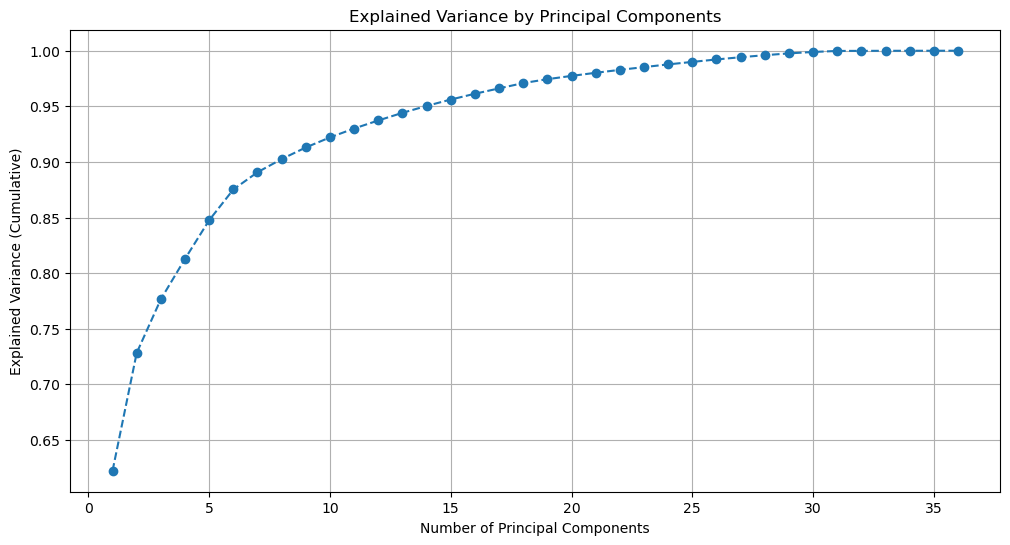

In [84]:
# Plot explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (Cumulative)')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [85]:
# Re-run PCA with the selected number of components
num_components = 8  # Adjust this value
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(Scaled_Data)

principal_components

array([[-5.86155559,  2.49750079, -2.71716121, ..., -0.47797818,
        -0.39383383,  0.08074359],
       [-5.03638061,  1.04798993, -3.46125353, ..., -0.45688605,
        -0.32433743,  0.57724693],
       [-6.2253327 ,  0.50747754, -2.88843564, ...,  0.10402073,
        -0.03398681,  0.32471132],
       ...,
       [ 2.95747761, -2.99675517,  2.12180035, ...,  1.39520494,
        -0.87866436,  0.54389735],
       [ 4.06944698, -1.18335629,  4.15460565, ...,  0.77499708,
         0.18095261, -0.82256614],
       [ 3.34441253,  1.14165634,  2.83001816, ...,  2.07325442,
         1.33469797,  1.20320075]])

In [89]:
from sklearn.cluster import KMeans

wcss = []
for n in range(1, 12):
    Km = KMeans(n_clusters=n, random_state=2)
    Km.fit(principal_components)
    wcss.append(Km.inertia_);

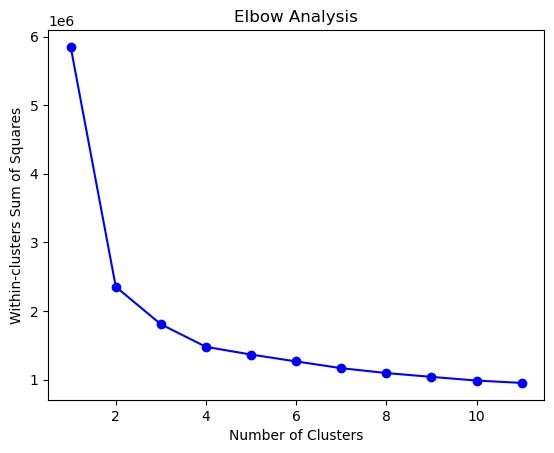

In [90]:
#ploting the elbow
plt.plot(np.arange(1,12), wcss, marker='o', color='blue', )
plt.title('Elbow Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-clusters Sum of Squares');

In [101]:
# Set a random seed for reproducibility
random_seed = 42
KMean_clust = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=random_seed)
KMean_clust.fit(principal_components)

#Find the clusters for the observation given in the dataset
players_data['Cluster'] = KMean_clust.labels_


In [102]:
players_data['Cluster'].value_counts()

Cluster
0    66308
3    48836
2    44852
1    20025
Name: count, dtype: int64

In [104]:
players_data.groupby('Cluster')[[ 'pace', 'shooting', 'overall',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']].mean()

pace   shooting    overall    passing  dribbling  defending  \
Cluster                                                                     
0        69.821424  58.172664  69.528247  64.926660  67.889772  59.594604   
1        62.000000  60.000000  64.295680  58.000000  63.000000  46.000000   
2        60.979332  35.039374  62.822996  47.446067  50.850375  61.573575   
3        72.167745  60.074310  63.767119  54.997952  64.768859  30.382136   

            physic  attacking_crossing  attacking_finishing  \
Cluster                                                       
0        68.386409           62.533465            54.456038   
1        61.000000           15.076704            12.961698   
2        67.135869           43.309641            30.567489   
3        57.864936           52.056004            61.088582   

         attacking_heading_accuracy  attacking_short_passing  \
Cluster                                                        
0                         58.002473                69.053855   
1                         15.166642                27.301973   
2                         59.258718                55.619393   
3                         53.045172                59.367127   

         attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
Cluster                                                                       
0                51.920734        66.664173    60.150449          54.979505   
1                13.334032        14.675855    15.542472          15.179975   
2                30.935722        46.758495    36.250691          33.531125   
3                54.038885        64.358977    53.213244          46.941744   

         skill_long_passing  skill_ball_control  movement_acceleration  \
Cluster                                                                  
0                 64.818272           68.854105              69.979565   
1                 26.202797           20.131885              38.564444   
2                 49.794101           53.241015              60.333519   
3                 49.814420           64.087784              72.240478   

         movement_sprint_speed  movement_agility  movement_reactions  \
Cluster                                                                
0                    69.675786         70.508023           67.031504   
1                    38.916355         40.132185           58.789663   
2                    61.470837         55.699724           57.917373   
3                    72.097367         70.299246           58.715824   

         movement_balance  power_shot_power  power_jumping  power_stamina  \
Cluster                                                                     
0               69.973457         66.169633      67.758370      73.177113   
1               43.273458         35.327441      57.713758      30.617828   
2               58.486533         45.921274      67.433269      64.152123   
3               69.272954         62.920899      62.092923      61.654701   

         power_strength  power_long_shots  mentality_aggression  \
Cluster                                                           
0             66.865356         59.781354             66.230802   
1             60.684345         13.533084             26.387466   
2             70.233412         33.147351             62.913404   
3             59.904005         56.465579             46.848821   

         mentality_interceptions  mentality_positioning  mentality_vision  \
Cluster                                                                     
0                      60.278865              61.395096         63.726323   
1                      17.391211              12.296380         35.954707   
2                      60.469812              38.007737         41.678855   
3                      27.331129              61.175792         56.514477   

         mentality_penalties  mentality_composure  \
Cluster                                             

In [105]:
cluster_category_map = {
    0: "Versatile Performers",
    1: "Mid-Tier Players",
    2: "Specialists in Skills",
    3: "Pacey Attacker-Defenders"
}

# Function to categorize players based on their skills
def categorize_players(row):
    if row['Cluster'] in cluster_category_map:
        return cluster_category_map[row['Cluster']]
    else:
        return "Other"

# Apply the categorization function to the DataFrame
players_data['player_category'] = players_data.apply(categorize_players, axis=1)


In [110]:
players_data[players_data['player_category']=='Mid-Tier Players']['long_name'].head(20)

6      Thibaut Nicolas Marc Courtois
9              Alisson Ramsés Becker
13             Marc-André ter Stegen
19         Ederson Santana de Moraes
22                         Jan Oblak
27              Gianluigi Donnarumma
29                      Gregor Kobel
30                      Mike Maignan
32                Manuel Peter Neuer
51          Wojciech Tomasz Szczęsny
72                       André Onana
74                       Kevin Trapp
77               Keylor Navas Gamboa
80          Damián Emiliano Martínez
85                    Yassine Bounou
96                    Aaron Ramsdale
103        Alejandro Remiro Gargallo
118                      Yann Sommer
119                    Péter Gulácsi
125                    Koen Casteels
Name: long_name, dtype: object

**Cluster 0: Balanced Playmakers (Versatile Performers)**

- These players in Cluster 0 exhibit strong performance in various attributes such as dribbling and ball control, movement reactions, and power stamina.
- They are well-balanced, with above-average attributes in most categories, including passing, physicality, and defending.
- This cluster includes versatile players who can contribute both offensively and defensively and are known for their overall consistency.
- These players are known for their skillful play and ability to create scoring opportunities through their specialized skills.

**Cluster 1: Moderate All-Rounders (Mid-Tier Players)**

- Cluster 1 comprises players with attributes at a moderate level.
- They may lack in other areas like offensive skills, speed and agility atributes, and defending but can excel in passiing, dribbling and physic. 
- They maintain a balanced performance without extreme highs or lows in their attributes.
- Players in this cluster can provide consistent contributions to the team without excelling in any specific category.

**Cluster 2: Skillful Specialists (Specialists in Skills)**

- Players in Cluster 2 focus on specific skill attributes such as power strenghth and defending moves
- They excel in defending, high power stamina, and ball control but may have weaker attributes in areas like defending and physicality.
- These players are known for their skillful play and ability to create scoring opportunities through their specialized skills.

**Cluster 3: Speedy Attack-Defenders (Pacey Attacker-Defenders)**

- Cluster 3 emphasizes high pace, which is their standout attribute.
- Players in this cluster are known for their speed, movement and agility 
- While they excel in pace, they may have weaker defending attributes, making them suitable for attacking positions.





attacking_crossing	attacking_finishing	attacking_heading_accuracy	attacking_short_passing	attacking_volleys	skill_dribbling	skill_curve	skill_fk_accuracy	skill_long_passing	skill_ball_control	movement_acceleration	movement_sprint_speed